<a href="https://colab.research.google.com/github/swiryat/Alice-skill/blob/master/%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BA%D0%B8_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%BE%D0%B1%D1%83%D0%B2%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Ноутбуки и PDF**  
ВШЭ Соколов  
https://github.com/hse-ds/iad-deep-learning/blob/master/2022/seminars/sem02/sem02_solution.ipynb  
https://github.com/hse-ds/iad-deep-learning/blob/master/2022/seminars/sem03/sem03_solution.ipynb  
ВШЭ Ильдус  
https://github.com/isadrtdinov/intro-to-dl-hse/blob/2022-2023/seminars/201/Seminar_3_Intro_to_DL-2.ipynb  
Глубокое обучение и вообще  
https://github.com/FUlyankin/deep_learning_pytorch/tree/main/week05_conv_nets  
https://github.com/FUlyankin/deep_learning_pytorch/blob/main/week06_conv_nets/conv_nn_solve.ipynb  
Deep Learning School  
https://github.com/DLSchool/deep-learning-school/tree/fall_2021_part1/08_Convolutional_Neural_Networks  
Физтех  
https://github.com/girafe-ai/ml-course/tree/master/week0_10_cnn  
Воронцов  
https://github.com/andriygav/MachineLearningSeminars/blob/master/sem15/main.ipynb  

---
**Статьи**  
Статья Deep Learning School про некоторые разновидности сверток  
https://telegra.ph/Vidy-2D-svertok-11-03  
Еще статья про это  
https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728  
Статья про свертки (RU)  
https://programforyou.ru/poleznoe/convolutional-network-from-scratch-part-zero-introduction  
Статья про Receptive field (поле восприятия) сверточных сеток  
https://theaisummer.com/receptive-field/  
Визуализация сверток  
https://ezyang.github.io/convolution-visualizer/index.html  
https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d  
https://github.com/vdumoulin/conv_arithmetic  
Сайт много разных статей визуализаций  
https://distill.pub/

In [ ]:
import requests
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Union
from PIL import Image

plt.rcParams['figure.figsize'] = (6, 4)

<img src=https://api.intechopen.com/media/chapter/19222/media/image11.png width=50%>

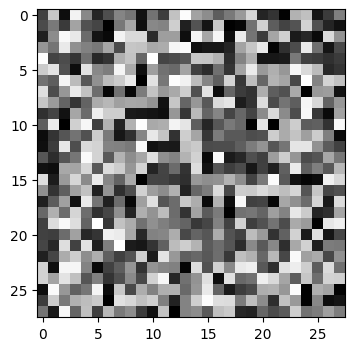

In [ ]:
# черно белая картинка 28 на 28 (height, width) (высота, ширина)
image = np.random.randint(0, 256, size=(28, 28))
plt.imshow(image, cmap='gray');

<img src=https://media.geeksforgeeks.org/wp-content/uploads/Pixel.jpg width=70%>

<img src=https://ask.gamebuka.com/images/qansphoto_83904_1.jpg width=70%>

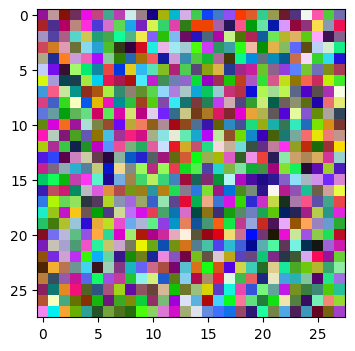

In [ ]:
# цветная картинка 28 на 28 на 3 (height, width, channels) (высота, ширина, число каналов)
image = np.random.randint(0, 256, size=(28, 28, 3), dtype=np.uint8)
plt.imshow(image);

In [ ]:
image.shape

(28, 28, 3)

In [ ]:
type(image)

numpy.ndarray

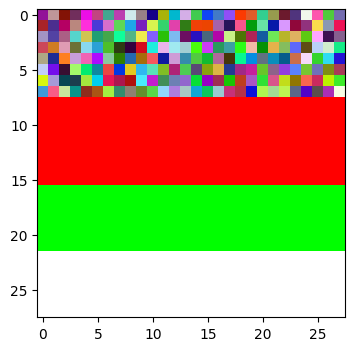

In [ ]:
# срез 8 по 15 пиксель по высоте и все пиксели по ширине сделать красными
image[8:16, :, :] = [255, 0, 0]  # [R, G, B]
# срез 16 по 21 пиксель по высоте и все пиксели по ширине сделать зелеными
image[16:22, :, :] = [0, 255, 0]
# срез 22 по последний пиксель по высоте и все пиксели по ширине сделать белым
image[22:, :, :] = [255, 255, 255]

plt.imshow(image);

In [ ]:
#  ссылка на картинку
image_url = 'https://fikiwiki.com/uploads/posts/2022-02/1644923027_30-fikiwiki-com-p-krasivie-kartinki-kroliki-30.jpg'

# открываем картинку по ссылке и прееводим в черно белую для наглядности визуализации
pil_image = Image.open(requests.get(image_url, stream=True).raw)
pil_image.size

(1200, 800)

In [ ]:
# Преобразование в NumPy-массив (матрицу)
image_matrix = np.array(pil_image)

# Вывод формы матрицы (высота, ширина, каналы)
print("Форма матрицы изображения:", image_matrix.shape)

# Вывод части матрицы (например, первые 5x5 пикселей)
print("\nПример части матрицы (5x5 пикселей, первый канал):")
print(image_matrix[:5, :5, 0])  # Для RGB выводим первый канал (Red)

Форма матрицы изображения: (800, 1200, 3)

Пример части матрицы (5x5 пикселей, первый канал):
[[4 4 3 3 3]
 [3 3 3 3 3]
 [1 2 2 3 3]
 [1 2 2 3 3]
 [2 2 3 3 3]]


In [ ]:
image_matrix

array([[[  4,   6,   1],
        [  4,   6,   1],
        [  3,   5,   0],
        ...,
        [ 37,  51,  54],
        [ 40,  54,  57],
        [ 41,  55,  58]],

       [[  3,   5,   0],
        [  3,   5,   0],
        [  3,   5,   0],
        ...,
        [ 36,  50,  53],
        [ 38,  52,  55],
        [ 40,  54,  57]],

       [[  1,   3,   0],
        [  2,   4,   0],
        [  2,   4,   0],
        ...,
        [ 35,  49,  50],
        [ 36,  50,  51],
        [ 37,  51,  52]],

       ...,

       [[ 81, 111,  77],
        [ 76, 106,  72],
        [ 73, 104,  70],
        ...,
        [ 82, 102,  53],
        [ 78,  98,  47],
        [ 76,  96,  45]],

       [[ 79, 108,  77],
        [ 75, 104,  73],
        [ 73, 104,  72],
        ...,
        [ 78,  98,  49],
        [ 75,  95,  44],
        [ 74,  94,  43]],

       [[ 75, 104,  73],
        [ 73, 102,  71],
        [ 73, 104,  72],
        ...,
        [ 74,  94,  45],
        [ 72,  92,  41],
        [ 72,  92,  41]]

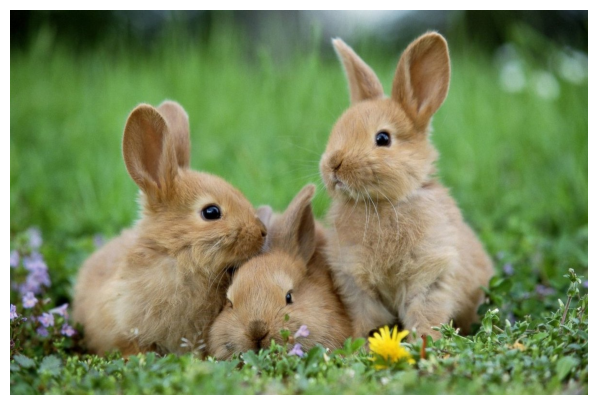

In [ ]:
plt.figure(figsize=(8, 5))
plt.imshow(pil_image)
plt.axis('off');

# Свертки

<img src=https://www.mdpi.com/sensors/sensors-19-01693/article_deploy/html/images/sensors-19-01693-g002.png width=50%>



<!-- <img src=https://www.rncm.ac.uk/uploads/Figure-3-CM-updated-convolution-1-2048x1254.png width=50%> -->

# Conv2D

Картинки и гифки отсюда  
https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

<img src=https://miro.medium.com/v2/resize:fit:786/format:webp/1*cTEp-IvCCUYPTT0QpE3Gjg@2x.png width=50%>

Инициализация матрицы данных

Зачем это нужно?
- Свёрточные слои в PyTorch (nn.Conv2d) ожидают вход в формате:
(batch_size, num_channels, height, width).

- Если подать просто [5, 5], PyTorch выдаст ошибку.

In [ ]:
# матрица данных как на картинке выше
data = [[1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]]

# преобразовать в тензор
# unsqueeze(0) превращает [5, 5] → [1, 5, 5]
# ещё раз unsqueeze(0) делает [1, 1, 5, 5]
data = torch.tensor(data, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# 1 элемент с 1 каналом размером 5 на 5
data, data.shape

(tensor([[[[1., 1., 1., 0., 0.],
           [0., 1., 1., 1., 0.],
           [0., 0., 1., 1., 1.],
           [0., 0., 1., 1., 0.],
           [0., 1., 1., 0., 0.]]]]),
 torch.Size([1, 1, 5, 5]))

| Размерность | Значение       | Объяснение                           |
| ----------- | -------------- | ------------------------------------ |
| `1`         | batch size = 1 | Один "пример" в батче                |
| `1`         | channels = 1   | Один канал (черно-белое изображение) |
| `5`         | height = 5     | Высота изображения                   |
| `5`         | width = 5      | Ширина изображения                   |


Инициализация кастомных параметров ядра свертки

In [ ]:
# задать параметры ядра свертки
kernel = [[1, 0, 1], [0, 1, 0], [1, 0, 1]]
kernel = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# 1 ядро свертки с 1 каналом размера 3 на 3
kernel, kernel.shape

(tensor([[[[1., 0., 1.],
           [0., 1., 0.],
           [1., 0., 1.]]]]),
 torch.Size([1, 1, 3, 3]))

Инициализация сверточного слоя с кастомным ядром

`torch.nn.Conv2d` [doc](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

- in_channels	- Число входных каналов (1 для ч/б, 3 для RGB)
- out_channels	- Сколько разных ядер (фильтров) применять. Чем больше out_channels, тем больше разных признаков учится находить сеть
- kernel_size - Размер ядра свёртки (например, 3×3 или 5×5)
- bias - Добавляет learnable-смещение (аналог b в уравнении y=Wx+b)

In [ ]:
# 1 свертка (out_channels) с 1 каналом (in_channels) с ядром размера 3 на 3
layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)

# заменить случайные веса слоя кастомными
# kernel — это тензор размера (1, 1, 3, 3), содержащий нужные значения фильтра (задали в предыдущей ячейке).
layer.weight.data.copy_(kernel)
# Таким образом, случайные веса, которые изначально сгенерировал PyTorch, заменяются вручную заданными значениями.

# отключить градиенты (не обязательно)
layer.weight.requires_grad_(False)

# посмотреть на веса
layer.weight

Parameter containing:
tensor([[[[1., 0., 1.],
          [0., 1., 0.],
          [1., 0., 1.]]]])

In [ ]:
# размерность ядра свертки
layer.weight.shape

torch.Size([1, 1, 3, 3])

In [ ]:
# исходная матрица данных
data

tensor([[[[1., 1., 1., 0., 0.],
          [0., 1., 1., 1., 0.],
          [0., 0., 1., 1., 1.],
          [0., 0., 1., 1., 0.],
          [0., 1., 1., 0., 0.]]]])

Применить свертку к данным, получить на выходе карту признаков (карту активаций)

<img src=https://miro.medium.com/max/786/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif width=50%>

- размерность input N
- ядро K
- Output N-k+1

In [ ]:
# применить операцию свертки к данным
conv_out = layer(data)

# на выходе карта признаков или карта активаций
conv_out

tensor([[[[4., 3., 4.],
          [2., 4., 3.],
          [2., 3., 4.]]]])

In [ ]:
# размерность выхода уменьшилась на 1 с каждой стороны
data.shape, conv_out.shape

(torch.Size([1, 1, 5, 5]), torch.Size([1, 1, 3, 3]))

## Padding (Conv2D parameter)

Операция паддинга делает матрицу данных шире и выше за счет добавления по краям значений как правило из нулей  
Это необходимо для контроля выходной размерности карт признаков, так же для обработки информации на краях исходной матрицы

padding (int, tuple или 'same', по умолчанию: 0)
- что делает: Добавляет нули по краям изображения, чтобы сохранить размер выхода.

- padding=1 → добавляет 1 пиксель с каждой стороны.

- padding='same' → автоматически подбирает padding для сохранения размера.

<img src=https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/same_padding_no_strides.gif width=30%>
<img src=https://miro.medium.com/max/786/1*W2D564Gkad9lj3_6t9I2PA@2x.gif width=55%>

In [ ]:
# сверточный слой с параметром padding
layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1)
conv_out = layer(data)

# размерность выхода сохранилась
data.shape, conv_out.shape

(torch.Size([1, 1, 5, 5]), torch.Size([1, 1, 5, 5]))

Для паддинга под капотом используется функция  
`torch.nn.functional.pad(input, pad, mode='constant', value=None)` [doc](https://pytorch.org/docs/stable/generated/torch.nn.functional.pad.html)

In [ ]:
# самый обычный паддинг - добавили нули по краям
import torch.nn.functional as F

F.pad(torch.ones(5, 5), (1, 1, 1, 1))

tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1., 0.],
        [0., 1., 1., 1., 1., 1., 0.],
        [0., 1., 1., 1., 1., 1., 0.],
        [0., 1., 1., 1., 1., 1., 0.],
        [0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# еще пример
data = torch.ones(2, 2)
data

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
# Добавим паддинг из чисел 10, 1 слева, 2 справа, 3 сверху и 4 снизу
F.pad(data, (1, 2, 3, 4), value=10)

tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10.,  1.,  1., 10., 10.],
        [10.,  1.,  1., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])

In [ ]:
nn.ZeroPad2d((1, 2, 3, 4))(data)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0.],
        [0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

## Stride (Conv2D parameter)

Свертка со Stride

<img src=https://miro.medium.com/max/786/1*4wZt9G7W7CchZO-5rVxl5g@2x.gif width=50% >

stride — это шаг, с которым свёрточное ядро "перемещается" по входному изображению.

Как работает stride?
При stride=1 ядро сдвигается на один пиксель по горизонтали или вертикали после каждого вычисления свёртки.

При stride=2 — ядро сдвигается на 2 пикселя.



то есть:
- Что делает: Шаг, с которым ядро перемещается по изображению.

- Эффект: Увеличивает stride → уменьшает размер выхода.

In [ ]:
# [BATCH_SIZE, CHANNELS, HEIGHT, WIDTH]
data = torch.ones(1, 1, 5, 5)
layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2)
conv_out = layer(data)

conv_out.shape

torch.Size([1, 1, 2, 2])

Stride + Padding

<img src=https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides.gif width=30%>

In [ ]:
# свертка со страйдом и паддингом
layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1)
conv_out = layer(data)

conv_out.shape

torch.Size([1, 1, 3, 3])

В Conv2D можно варьировать шаг не только по горизонтали, но и по вертикали, указав соответсвующий `stride`

In [ ]:
# окно свертки будет накладываться на тензор вправо с шагом 2 и вниз с шагом 1
layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=(1, 2))
conv_out = layer(data)

conv_out.shape

torch.Size([1, 1, 3, 2])

dilation (int или tuple, по умолчанию: 1)

Что делает:
- Разрежает ядро, увеличивая его зону охвата без роста числа параметров.

Аналог: "Дырявое" ядро (например, dilation=2 для ядра 3×3 будет охватывать 5×5, но с пропусками).

Пример:




In [ ]:
layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, dilation=1)
conv_out = layer(data)

conv_out.shape

torch.Size([1, 1, 3, 3])

In [ ]:
(5 + 2*0 - 1*(3 - 1) - 1)/1 + 1

3.0

Формула расчета размерности:

$$
{out\_size} = \left\lfloor \frac{{in\_size} + 2 \times \text{padding} - \text{dilation} \times ({kernel\_size} - 1) - 1}{\text{stride}} + 1 \right\rfloor
$$

## Pooling layers

Слои пуллинга нужны для уменьшения размерности карт признаков

<img src=https://miro.medium.com/max/786/1*ReZNSf_Yr7Q1nqegGirsMQ@2x.webp  width=50%>

`torch.nn.MaxPool2d` [doc](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)

In [ ]:
torch.manual_seed(111)

# инициализация матрицы данных
# torch.nn.MaxPool2d как и все слои, принимает на вход float числа
data = torch.randint(0, 20, size=(1, 1, 4, 4)).float()
data

tensor([[[[ 0., 12., 16.,  8.],
          [ 2.,  7.,  1.,  6.],
          [14., 14.,  4., 19.],
          [13.,  3.,  4., 18.]]]])

In [ ]:
# инициализация слоя MaxPool2d - он отбирает максимальные значения
layer = nn.MaxPool2d(kernel_size=2)

# на выходе слоя MaxPool2d максимальные значения из каждого окошка размера (kernel_size, kernel_size)
layer(data)

tensor([[[[12., 16.],
          [14., 19.]]]])

`torch.nn.AvgPool2d` [doc](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html)

In [ ]:
# на выходе слоя AvgPool2d средние значения из каждого окошка размера (kernel_size, kernel_size)
layer = nn.AvgPool2d(kernel_size=2)
layer(data)

tensor([[[[ 5.2500,  7.7500],
          [11.0000, 11.2500]]]])

`torch.nn.AdaptiveMaxPool2d` [doc](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveMaxPool2d.html)

In [ ]:
# можно указать сколько максимумов на выходе нужно - например просто одно по всему каналу
layer = nn.AdaptiveMaxPool2d(output_size=1)
layer(data)

tensor([[[[19.]]]])

In [ ]:
# либо указав выходной размер, сколько максимумов будет взято
layer = nn.AdaptiveMaxPool2d((1, 2))
layer(data)

tensor([[[[14., 19.]]]])

Этот прием может применяться, когда нам нужно из тензора с картами признаков любой размерности получать одну постоянную  
Пример: есть три тензора разных размеров, нам нужно получить три тензора одинаковой размерности 16 на 16

In [ ]:
# размеры для тензоров
shapes = [(32, 32), (320, 240), (1920, 1080)]

# создание тензоров с заданными размерами
images = [torch.rand(1, 3, wigth, height) for wigth, height in shapes]

[image.shape for image in images]

[torch.Size([1, 3, 32, 32]),
 torch.Size([1, 3, 320, 240]),
 torch.Size([1, 3, 1920, 1080])]

In [ ]:
# слой усреднения который всегда приводит тензор к размерности 16, 16
layer = nn.AdaptiveAvgPool2d((16, 16))

# каждую картинку пропустить через пулинг
images_out = [layer(image) for image in images]

[image.shape for image in images_out]

[torch.Size([1, 3, 16, 16]),
 torch.Size([1, 3, 16, 16]),
 torch.Size([1, 3, 16, 16])]

# Пример Conv2d над картинкой

In [ ]:
# ?nn.Conv2d

Загрузка картинки

In [ ]:
import requests
from PIL import Image

#  ссылка на картинку
image_url = 'https://fikiwiki.com/uploads/posts/2022-02/1644923027_30-fikiwiki-com-p-krasivie-kartinki-kroliki-30.jpg'

# открываем картинку по ссылке и прееводим в черно белую для наглядности визуализации
pil_image = Image.open(requests.get(image_url, stream=True).raw).convert('L')
pil_image.size

(1200, 800)

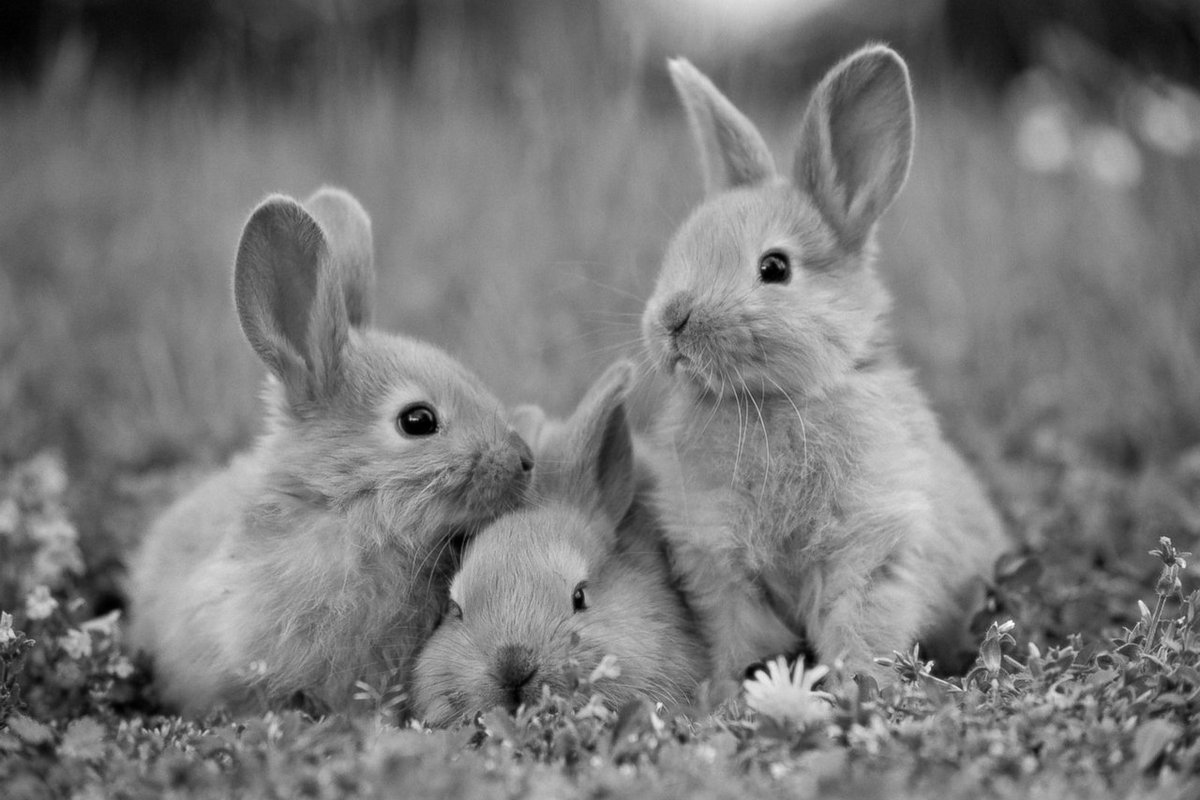

In [ ]:
pil_image

Изменение размера картинки

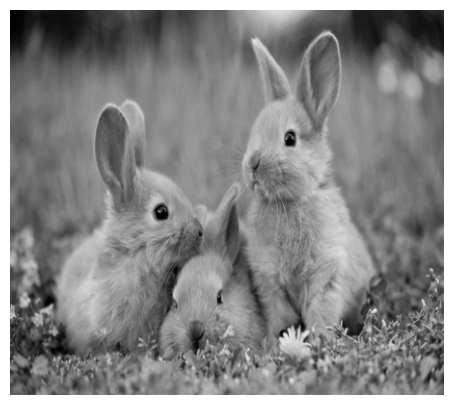

In [ ]:
# изменение размера картинки
pil_image_resize = pil_image.resize((450, 400))

plt.figure(figsize=(8, 5))
plt.imshow(pil_image_resize, cmap='gray')
plt.axis('off');

Преобразовать картинку в тензор

In [ ]:
# from torchvision.transforms.transforms import ToTensor
from torchvision.transforms.functional import to_tensor

# преобразование из PIL в тензор
# при этом происходит нормировка картинки из [0 - 255] в [0 - 1]
image_tensor = to_tensor(pil_image_resize).unsqueeze(0)

# [BATCH_SIZE, CHANNELS, HEIGHT, WEIGHT]
image_tensor.shape

torch.Size([1, 1, 400, 450])

Применение Conv2D к картинке через слой

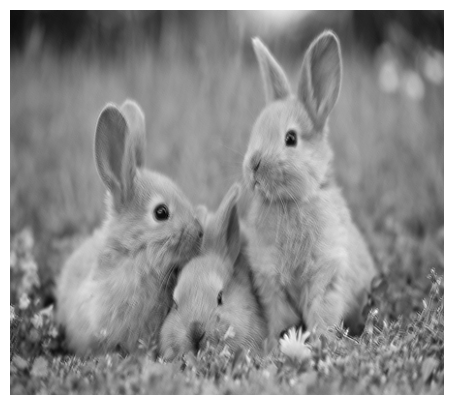

In [ ]:
torch.manual_seed(111)

# случайное ядро свертки по умолчанию
layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)

# отключить градиенты просто чтобы каждый раз не вызывать detach()
layer.weight.requires_grad_(False)

# forward pass, операция свертки
out = layer(image_tensor)

# отрисовка результата
plt.figure(figsize=(8, 5))
plt.imshow(out[0,0], cmap='gray')
plt.axis('off');

In [ ]:
out

tensor([[[[0.0057, 0.0092, 0.0065,  ..., 0.0667, 0.0737, 0.0753],
          [0.0035, 0.0080, 0.0080,  ..., 0.0669, 0.0698, 0.0746],
          [0.0091, 0.0078, 0.0047,  ..., 0.0609, 0.0695, 0.0707],
          ...,
          [0.1428, 0.1456, 0.1560,  ..., 0.1990, 0.1869, 0.1805],
          [0.1453, 0.1453, 0.1556,  ..., 0.1883, 0.1848, 0.1793],
          [0.1485, 0.1480, 0.1592,  ..., 0.1881, 0.1809, 0.1804]]]])

Заменить ядро свертки со случайной инициализацией весов на конкретное

In [ ]:
# новое ядро свертки
kernel = [[-1, -1, -1],
           [-1, 8, -1],
           [-1, -1, -1]]
kernel = torch.tensor([[kernel]], dtype=image_tensor.dtype)

# заменить ядро слоя на новое
layer.weight.data = kernel

# посмотреть на ядро и его размерность
layer.weight, layer.weight.shape

(Parameter containing:
 tensor([[[[-1., -1., -1.],
           [-1.,  8., -1.],
           [-1., -1., -1.]]]]),
 torch.Size([1, 1, 3, 3]))

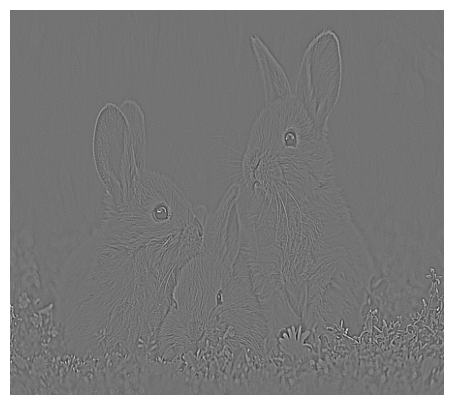

In [ ]:
# применить свертку к картинке
out = layer(image_tensor)

plt.figure(figsize=(8, 5))
plt.imshow(out[0, 0], cmap='gray')
plt.axis('off');

Conv2D через функцию для удобства

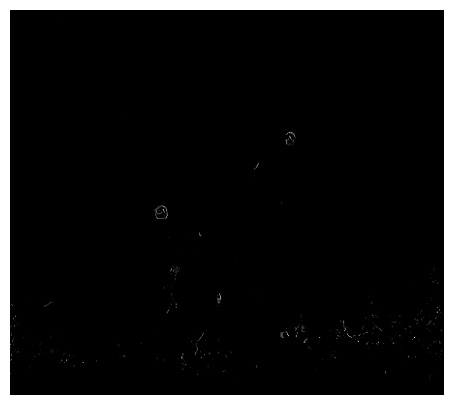

In [ ]:
# через функцию а не через слой
import torch.nn.functional as F

# функция принимает картинку (тензор) и ядро (список), делает операцию свертки и отрисовывает картинку
def conv_forward_show(image: torch.Tensor, kernel: list) -> None:
    # преобразовать список в тензор и применить свертку к картинке
    kernel = torch.tensor([[kernel]], dtype=image.dtype)
    out_tensor_image = F.conv2d(image, kernel)

    # отрисовка результата
    plt.figure(figsize=(8, 5))
    plt.imshow(out_tensor_image[0, 0].clip(0, 1), cmap='gray')  #
    plt.axis('off')
    plt.show()


# ядро, которым хотим сделать свертку
kernel = [[0, 1, 0],
           [1, -5, 1],
           [0, 1, 0]]

# применение свертки
conv_forward_show(image_tensor, kernel)

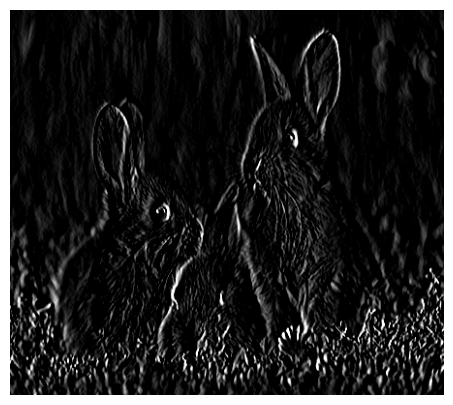

In [ ]:
# фильтр собеля для вертикальных границ
kernel = [[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]]

conv_forward_show(image_tensor, kernel)

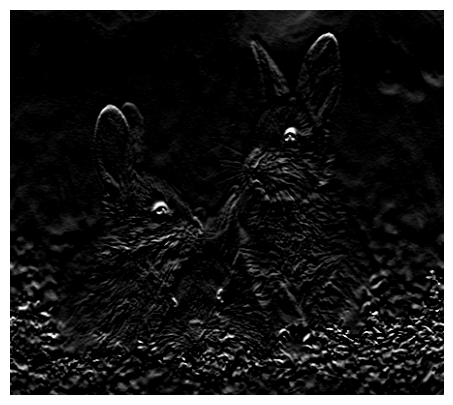

In [ ]:
# фильтр собеля для горизонтальных границ
kernel = [[1, 2, 1],
           [0, 0, 0],
           [-1, -2, -1]]

conv_forward_show(image_tensor, kernel)

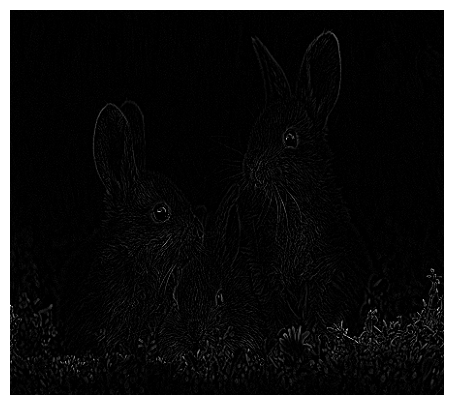

In [ ]:
# резкость
kernel = [[0, -1, 0],
           [-1, 4, -1],
           [0, -1, 0]]

conv_forward_show(image_tensor, kernel)

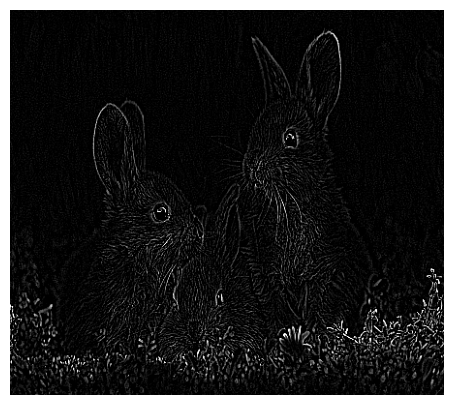

In [ ]:
# выделение поиск границ краев
kernel = [[-1, -1, -1],
           [-1, 8, -1],
           [-1, -1, -1]]

conv_forward_show(image_tensor, kernel)

# Пример Conv2D классификация ботинок

In [ ]:
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, Subset
import torchvision.transforms as T
from torchvision.utils import make_grid
from torch.utils.data import random_split
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict, Union
from IPython.display import clear_output
from pathlib import Path
from PIL import Image
import requests
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook

plt.rcParams['figure.figsize'] = (6, 4)

## Data

Датасет ботинок Kaggle  
https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

Загрузка дасета из Kaggle - закинуть в колаб `kaggle.json` и выполнить код ниже

In [ ]:
from google.colab import drive
import json
drive.mount('/content/drive')
# установим kaggle
!pip install kaggle -q
!mkdir ~/.kaggle
# копируем kaggle.json в папку ~/.kaggle/
!cp "/content/drive/MyDrive/Colab Notebooks/config/kaggle.json" ~/.kaggle/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# загрузка датасета
!kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

Dataset URL: https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images
License(s): copyright-authors
shoe-vs-sandal-vs-boot-dataset-15k-images.zip: Skipping, found more recently modified local copy (use --force to force download)


y

In [ ]:
# распаковка архива датасета
!unzip -q /content/shoe-vs-sandal-vs-boot-dataset-15k-images.zip

replace Shoe vs Sandal vs Boot Dataset/Boot/boot (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Инициализация датасета

In [ ]:
# проверка что лежит в папке датасета - три папки для 3х видов обуви
dataset_path = 'Shoe vs Sandal vs Boot Dataset'
!ls "{dataset_path}"

In [ ]:
# аугментации - изменение размера и преобразование картинки PIL в тензор
transform = T.Compose([T.Resize(size=(64, 64)), T.ToTensor()])

# инициализация датасета с аугментациями
dataset = ImageFolder(dataset_path, transform=transform)

# словарь {индекс класса: название класса}
index_to_class = {value: key for key, value in dataset.class_to_idx.items()}
index_to_class

Проверка распределения по классам

In [ ]:
# dataset.targets содержит индексы классов каждого объекта (0, 1, 2)
target_indexes = torch.tensor(dataset.targets)

plt.bar([0, 1, 2], target_indexes.bincount())
plt.xticks([0, 1, 2], list(index_to_class.values()))
plt.show()

Разделение датасета на тренировочный и проверочный

In [ ]:
# разделение 70% на обучение и 30 на валидацию
train_set, val_set = random_split(dataset, [0.7, 0.3])

len(train_set), len(val_set)

Отрисовка примеров

In [ ]:
# картинка из 8 примеров датасета, соединенных через make_grid
grid = make_grid([dataset[i][0] for i in range(8)], nrow=4)
plt.figure(figsize=(15, 4))
plt.imshow(grid.permute(1, 2, 0));

`pin_memory=True: ` Если установлен в True, то данные будут копироваться в память CUDA (если доступна) перед передачей в модель.

In [ ]:
# размер батча - по сколько за раз будет отдавать картинок и меток класса даталоадер
BATCH_SIZE = 32
# инициализация даталоадеров
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

# проверка работы даталоадера
images, indxs = next(iter(train_loader))

# 32 картинки с 3 каналами размером 64, 64 и 32 метки класса для каждой картинки
images.shape, indxs

## Model

Вспомогательная функция для отрисовки графиков с метриками

In [ ]:
# функция отрисовки метрик, принимает словарь метрик - ошибка и accuracy на тренироввочном наборе данных
def plot_metrics(metrics: dict) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    train_loss, val_loss, train_acc, val_acc = metrics.values()

    axes[0].set_title(f'Train loss: {train_loss[-1]:.2f}, Val loss: {val_loss[-1]:.2f}')
    axes[0].plot(train_loss, label='Train_loss')
    axes[0].plot(val_loss, label='Val_loss')

    axes[1].set_title(f'Train acc: {train_acc[-1]:.2f}, Val acc: {val_acc[-1]:.2f}')
    axes[1].plot(train_acc, label='Train_acc')
    axes[1].plot(val_acc, label='Val_acc')

    legend = [ax.legend() for ax in axes]
    plt.show()

Класс модели

In [ ]:
torch.manual_seed(111)

# класс для сверточной сети классификации
class BootsModel(nn.Module):
    def __init__(self, input_size: Tuple[int], conv_size: int):
        super().__init__()
        # сверточная часть сети
        # Сверточные слои разного размера, применяются к входным данным для выделения признаков из картинок
        self.conv = nn.Sequential(
            # input_size[0] - кол-во каналов  входной картинки
            # conv_size определяет количество каналов на выходе этого слоя.

#             Каждый фильтр выучивает отдельные признаки изображения.
#             Чем больше фильтров, тем больше признаков будет выучено,
#             но это также увеличивает количество параметров и вычислительную сложность.

#             свертка это паттерн, и операция свертки это скалярное произведение паттерна на часть картинки
# скалярное произведение  показывает на сколько вектор части картинки и вектор паттерна похожи,
#             то есть на сколько паттерн присутсвует на картинке поэтому свертки дают хорошие фичи

            nn.Conv2d(input_size[0], conv_size, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(conv_size, conv_size*2, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(conv_size*2, conv_size*4, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(conv_size*4, conv_size*8, 3, stride=2, padding=1),
            nn.ReLU()
            )

        # расчет размерности линейного слоя
        linear_size = self.calc_linear_size(image_size)

        # линейные слои
        self.linear = nn.Sequential(nn.Flatten(),
            nn.Linear(linear_size, 512), nn.ReLU(),
            nn.Linear(512, len(index_to_class)))  # на выходе столько нейронов сколько классов

    # calc_linear_size - функция расчета размерности выхода последнй свертки для входа линейного слоя
    # torch.inference_mode - Этот декоратор отключает вычисление градиентов внутри метода.
    @torch.inference_mode()
    def calc_linear_size(self, input_size: Tuple[int]) -> int:
        # массив случайных данных размера как у входных картинок
        empty_image = torch.empty(input_size)
        # пропустить этот массив через сверточный блок
        conv_out_size = self.conv(empty_image)
        # и посмотреть какой размер получится, сколько там всего чисел
        # Метод numel() возвращает общее количество элементов (чисел) в тензоре.

        linear_size = conv_out_size.numel()
        print(f'Model create. Conv out size: {conv_out_size.shape}, Linear size: {linear_size}')
        return linear_size

    def forward(self, inp: torch.Tensor) -> torch.Tensor:
        x = self.conv(inp)
        out = self.linear(x)
        return out


# взять первую картинку из датасета и записать ее размер (3, 64, 64)
image_size = tuple(train_set[0][0].shape)

# число сверток на первом слое сверточного блока
conv_size = 16

# создание модели и перемещение на девайс
model = BootsModel(image_size, conv_size)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# оптимизатор и функция ошибки
# Learning Rate, скорость обучения
LR = 0.001
opt = torch.optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

model

## Train

Обучение модели

In [ ]:
torch.manual_seed(111)

# кол-во эпох обучения и словарь для метрик
EPOCHS = 5
metrics = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

for epoch in tqdm(range(EPOCHS), desc='Epoch'):
    # ========================= TRAIN =============================
    loss_epoch, acc_epoch  = 0, 0
    len_dataset = len(train_loader.dataset)

    for images, targets in tqdm_notebook(train_loader):
        # переместить картинки и таргеты на дейвайс
        images = images.to(device)
        targets = targets.to(device)

        # пропустить картинки через модель и посчитать ошибку
        logits = model(images)
        loss = loss_fn(logits, targets)

        # обучение сети
        opt.zero_grad()
        # вычисляются градиенты потерь по отношению к параметрам модели.
        loss.backward()
        # оптимизатор обновляет параметры модели на основе вычисленных градиентов.
        opt.step()

        # так как ошибка усредняется по батчу, делаем обратную денормировку
        # чтобы потом просто разделить на длину датасета
        loss_epoch += loss.item() * targets.size(0)
        acc_epoch += torch.sum(logits.argmax(dim=1) == targets).item()

    metrics['train_loss'].append(loss_epoch / len_dataset)
    metrics['train_acc'].append(acc_epoch / len_dataset)

    # ======================= VALIDATION =================================
    loss_epoch, acc_epoch  = 0, 0
    len_dataset = len(val_loader.dataset)

    # на валидации не нужно считатать градиенты
    with torch.inference_mode():
        for images, targets in val_loader:
            images = images.to(device)
            targets = targets.to(device)

            logits = model(images)
            loss = loss_fn(logits, targets)

            loss_epoch += loss.item() * targets.size(0)
            acc_epoch += torch.sum(logits.argmax(dim=1) == targets).item()

    metrics['val_loss'].append(loss_epoch / len_dataset)
    metrics['val_acc'].append(acc_epoch / len_dataset)

    # отрисовка графиков
    clear_output(True)
    plot_metrics(metrics)

Сохранение весов

In [ ]:
# сохранить веса модели на диск
model_path = 'model_boots.pt'
torch.save(model.state_dict(), model_path)

Загрузка весов

In [ ]:
# создать экземпляр модели, если ранее не создавали
model = BootsModel(image_size, conv_size)

# перемещаем модель на девайс
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# загрузка весов с диска
state_dict = torch.load(model_path, map_location=device)
# загрузка весов в модель
model.load_state_dict(state_dict)

## Inference

In [ ]:
# ссылка из интернета
image_url = 'https://ecco.ru/images/eshop/img/jpg/bigw/522054_57132.jpg'
pil_image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')

plt.imshow(pil_image);

In [ ]:
tensor_image = transform(pil_image).permute(1, 2, 0)
plt.imshow(tensor_image);

In [ ]:
# переводим модель в режим оценки (инференса)
model.eval();

In [ ]:
# применить аугментации, на которых модель обучалась (либо валидировалась если они отличавлись)
tensor_image = transform(pil_image)

# пропустить картинку ботинка через модель, получить предсказания (логиты)
# не забыть добавить размерность и перементить на девайс
with torch.inference_mode():
#     Метод unsqueeze(0) добавляет новую ось размером 1 в начало тензора. Результирующий тензор будет иметь размерность [1, H, W, C], где:

#     1 — новая размерность, представляющая размер батча (количество изображений в батче). В данном случае это один образец.
#     H — высота изображения.
#     W — ширина изображения.
#     C — количество каналов изображения.
    logits = model(tensor_image.unsqueeze(0).to(device))

# получить индекс предсказанного класса - максимальный логит
class_index = logits.argmax(dim=-1).item()

# получить вероятности предсказанных классов (просто чтобы посмотреть)
probs = torch.softmax(logits, dim=-1).tolist()

print(f'Предасказанный класс: {index_to_class[class_index]}')
print('======================')
for class_name, prob in zip(index_to_class.values(), probs[0]):
    print(f'Класс: {class_name}, вероятность: {prob:.2f}')

В датасете вся обувь повернута налево, поэтому если при обучении не использовали нужную аугментацию, результат может быть плохим как на примере

In [ ]:
# перевернем ботинок
flip_img = T.RandomHorizontalFlip(p=1)(pil_image)
plt.imshow(flip_img);

In [ ]:
# тоже самое с новой аугментацией
flip_img = T.RandomHorizontalFlip(p=1)(pil_image)
tensor_image = transform(flip_img)

with torch.inference_mode():
    logits = model(tensor_image.unsqueeze(0).to(device))

class_index = logits.argmax(dim=-1).item()
probs = torch.softmax(logits, dim=-1).tolist()

print(f'Предасказанный класс: {index_to_class[class_index]}')
print('======================')
for class_name, prob in zip(index_to_class.values(), probs[0]):
    print(f'Класс: {class_name}, вероятность: {prob:.2f}')

Будет полезно добавить аугментацию на трейн - случайные повороты, чтобы модель была устойчива и к ботинкам повернутым влево

## Попытка 2

Хотим разные аугментации для трейна и теста, и при этом не писать полностью свой класс датасета, а использовать `ImageFolder`

In [ ]:
# на трейне будем делать случайные повороты, для повышения устойчивости модели
train_transform = T.Compose([T.Resize(size=(64, 64)),
                             T.RandomHorizontalFlip(p=0.5),
                             T.ToTensor()])

# на валидации оценивать качество на исходном датасете без поворотов
val_transform = T.Compose([T.Resize(size=(64, 64)), T.ToTensor()])

# два экземпляра одного и того же всего датасета с разными аугментациями
train_dataset = ImageFolder(dataset_path, transform=train_transform)
val_dataset = ImageFolder(dataset_path, transform=val_transform)

In [ ]:
# разделение на трейн и тест
# индексы для трейна и теста, которые нужны объекту Subset
train_set, val_set = torch.utils.data.random_split(dataset, [0.7, 0.3])

# Subset принимает сам датасет и индексы, по которым он будет выбирать данные
train_subset = Subset(train_dataset, train_set.indices)
val_subset = Subset(val_dataset, val_set.indices)

In [ ]:
# инициализаия даталоадеровв
BATCH_SIZE = 32
train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

# проверка даталоадера
images, indxs = next(iter(train_loader))
images.shape, indxs

Инициализация модели

In [ ]:
# создание модели и перемещение на девайс
model = BootsModel(image_size, conv_size)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

LR = 0.001
opt = torch.optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

model

Обучение модели

In [ ]:
torch.manual_seed(111)

EPOCHS = 15
metrics = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

for epoch in tqdm(range(EPOCHS), desc='Epoch'):
    loss_epoch, acc_epoch  = 0, 0
    len_dataset = len(train_loader.dataset)

    for images, targets in tqdm_notebook(train_loader):
        images = images.to(device)
        targets = targets.to(device)

        logits = model(images)
        loss = loss_fn(logits, targets)

        opt.zero_grad()
        loss.backward()
        opt.step()

        loss_epoch += loss.item() * targets.size(0)
        acc_epoch += torch.sum(logits.argmax(dim=1) == targets).item()

    metrics['train_loss'].append(loss_epoch / len_dataset)
    metrics['train_acc'].append(acc_epoch / len_dataset)

    loss_epoch, acc_epoch  = 0, 0
    len_dataset = len(val_loader.dataset)

    with torch.inference_mode():
        for images, targets in val_loader:
            images = images.to(device)
            targets = targets.to(device)

            logits = model(images)
            loss = loss_fn(logits, targets)

            loss_epoch += loss.item() * targets.size(0)
            acc_epoch += torch.sum(logits.argmax(dim=1) == targets).item()

    metrics['val_loss'].append(loss_epoch / len_dataset)
    metrics['val_acc'].append(acc_epoch / len_dataset)

    clear_output(True)
    # print(f'Epoch: {epoch}')
    plot_metrics(metrics)

Inference

In [ ]:
image_url = 'https://ecco.ru/images/eshop/img/jpg/bigw/522054_57132.jpg'
pil_image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')

plt.imshow(pil_image);

In [ ]:
tensor_image = val_transform(pil_image)

model.eval()
with torch.inference_mode():
    logits = model(tensor_image.unsqueeze(0).to(device))

class_index = logits.argmax(dim=-1).item()
probs = torch.softmax(logits, dim=-1).tolist()

print(f'Предасказанный класс: {index_to_class[class_index]}')
print('======================')
for class_name, prob in zip(index_to_class.values(), probs[0]):
    print(f'Класс: {class_name}, вероятность: {prob:.2f}')

#вопрос

In [ ]:
!gdown 1Fvme3JfAXmU6KwzoT6Q6vSGMYXYVGf3n

In [ ]:
!gdown 1BO5YBmqzClT3kZtciYCZwOdqWE7Iv54k

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображений
pict_2 = cv2.imread('/content/pict_1.png', cv2.IMREAD_GRAYSCALE)
pict_1 = cv2.imread('/content/pict_2.png', cv2.IMREAD_GRAYSCALE)

# Выравнивание размеров (если нужно)
pict_1 = cv2.resize(pict_1, (pict_2.shape[1], pict_2.shape[0]))

# Вычисление абсолютной разницы
diff = cv2.absdiff(pict_1, pict_2)

# Бинаризация отличий (порог)
_, diff_thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

# Визуализация
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.title('pict_2'); plt.imshow(pict_2, cmap='gray')
plt.subplot(1,3,2); plt.title('pict_1'); plt.imshow(pict_1, cmap='gray')
plt.subplot(1,3,3); plt.title('Отклонения'); plt.imshow(diff_thresh, cmap='hot')
plt.show()


SSIM (Structural Similarity Index Measure) - это метрика, которая оценивает насколько два изображения "визуально" похожи, имитируя восприятие человека.

- 1.0 — полное совпадение (визуально идентичны),

- <0.5 — заметные отличия.

In [ ]:
from skimage.metrics import structural_similarity as ssim

score, diff_map = ssim(pict_2, pict_1, full=True)
print(f"SSIM: {score:.3f}")

plt.imshow(diff_map, cmap='hot')
plt.title('Карта структурных отличий (1.0 = идеально)')
plt.colorbar()
plt.show()


предобученнвя нейросеть LPIPS (Learned Perceptual Image Patch Similarity). Это современная альтернатива SSIM, дающая "человеко-подобную" оценку.

In [ ]:
pip install lpips

In [ ]:
import torch
import lpips
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Загружаем LPIPS-модель (на основе VGG, можно использовать Alex или Squeeze)
loss_fn = lpips.LPIPS(net='vgg')  # 'alex', 'vgg', or 'squeeze'

# Загружаем и преобразуем два изображения
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # LPIPS expects images in [-1, 1]
])

# Замените пути на свои изображения
img1 = Image.open("/content/pict_1.png").convert("RGB")
img2 = Image.open("/content/pict_2.png").convert("RGB")

img1_tensor = transform(img1).unsqueeze(0)
img2_tensor = transform(img2).unsqueeze(0)

# Вычисляем LPIPS-дистанцию
with torch.no_grad():
    distance = loss_fn(img1_tensor, img2_tensor)

print(f"LPIPS расстояние: {distance.item():.4f}")

# Визуализация изображений
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Изображение 1')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Изображение 2')

plt.suptitle(f'LPIPS расстояние: {distance.item():.4f}')
plt.show()


- придумать пример про эмбединги для картинок